In [ ]:
"""
NOTEBOOK: IQ

We'll simulate IQ scores, assumed ~ N(100, 15^2),
to illustrate Z-Scores, the Law of Large Numbers, and the Central Limit Theorem.

Make sure you run each cell in sequence.
"""

# =========================
# 1. SETUP
# =========================

# import numpy for numerical operations
import numpy as np

# import matplotlib for plotting; 'pyplot' is a convenient module for creating plots
import matplotlib.pyplot as plt

# import the 'norm' class from scipy.stats, which provides methods for the Normal distribution
from scipy.stats import norm

# %matplotlib inline makes plots display directly in the notebook
%matplotlib inline

# set a random seed for reproducibility
np.random.seed(101)

# define true parameters for our simulated IQ scenario
true_mean = 100.0  # typical mean IQ
true_std = 15.0    # typical standard deviation for IQ

print("Setup complete. We'll use an IQ scenario with mean=100, std=15.")


In [ ]:
# =========================
# 2. Z-SCORES
# =========================

# A Z-score measures how many standard deviations an observation is from the mean.
# Formula: z = (x - mu) / sigma
# If X ~ N(mu, sigma^2), then Z ~ N(0, 1).

# 2.1 EXAMPLE: SINGLE IQ SCORE

# norm.rvs(loc, scale, size) generates random variates from a Normal distribution
# with mean=loc and standard deviation=scale. 
# 'size' specifies how many random values to generate.
single_iq = norm.rvs(loc=true_mean, scale=true_std, size=1)[0]
print("Single simulated IQ score:", single_iq)

# we compute the Z-score as (x - mean) / std
z_single = (single_iq - true_mean) / true_std
print("Z-score of this IQ:", z_single)

# 2.2 MANY IQ SCORES & CHECK DISTRIBUTION OF Z-SCORES

N = 10_000  # number of IQ scores to simulate

# generate N random IQ scores
iq_scores = norm.rvs(loc=true_mean, scale=true_std, size=N)

# compute z-scores for each IQ (standardize them)
z_scores = (iq_scores - true_mean) / true_std

# we'll create a histogram of the z-scores and compare with the standard normal distribution

# plt.figure(...) initializes a new figure of a certain size
plt.figure(figsize=(8,5))

# plt.hist(...) plots a histogram of data
# 'density=True' normalizes the histogram so it shows a probability density rather than raw counts
# 'alpha=0.6' sets the transparency
plt.hist(z_scores, bins=30, density=True, alpha=0.6, label='Empirical Z-scores')

# create a grid of x-values for plotting the theoretical standard normal pdf
x_values = np.linspace(-4, 4, 300)

# norm.pdf(x, loc, scale) computes the Probability Density Function of a Normal distribution
# with mean=loc and standard deviation=scale.
# For the standard normal distribution, loc=0, scale=1.
standard_pdf = norm.pdf(x_values, 0, 1)

# plt.plot(...) draws a curve on the current figure
plt.plot(x_values, standard_pdf, 'r-', lw=2, label='Standard Normal PDF')

plt.title("Distribution of Z-scores (IQ scenario)")
plt.xlabel("Z-score")
plt.ylabel("Density")
plt.grid(alpha = 0.3)
plt.legend()
plt.show()


In [ ]:
# =========================
# 3. LAW OF LARGE NUMBERS
# =========================

# The Law of Large Numbers (LLN) states that the sample mean converges to the true mean
# as the sample size n grows.

# 3.1 DISCRETE SAMPLE SIZES
sample_sizes = [10, 50, 100, 500, 1000, 5000, 10000]
means_list = []

for n in sample_sizes:
    # generate 'n' IQ scores
    sample = norm.rvs(loc=true_mean, scale=true_std, size=n)
    # compute the sample mean
    sample_mean = np.mean(sample)  # np.mean(...) computes the average
    means_list.append(sample_mean)

# print out how each sample mean compares to the true mean
print("Sample size vs. sample mean:")
for s, m in zip(sample_sizes, means_list):
    print(f"n={s:5d} -> sample mean={m:.2f}")

# 3.2 RUNNING MEAN DEMONSTRATION
# we'll generate one large sample and see how the mean evolves as we include more data

max_n = 10000
large_sample = norm.rvs(loc=true_mean, scale=true_std, size=max_n)

# np.cumsum(...) computes the cumulative sum of an array element-wise
# i.e., if large_sample = [x1, x2, x3, ...], cumsum = [x1, x1+x2, x1+x2+x3, ...]
cumsum_vals = np.cumsum(large_sample)

# the running mean up to index i is cumsum_vals[i] / (i+1)
running_means = cumsum_vals / np.arange(1, max_n+1)

plt.figure(figsize=(8,5))
# plt.plot(...) connects data points or draws a line
plt.plot(running_means, label='Running Sample Mean')

# plt.axhline(...) draws a horizontal line across the plot
# we use it to represent the true mean of 100
plt.axhline(true_mean, color='red', linestyle='--', label='True Mean=100')
plt.title("Law of Large Numbers: Running Mean for IQ Data")
plt.xlabel("Number of Samples (n)")
plt.ylabel("Sample Mean")
plt.grid(alpha = 0.3)
plt.legend()
plt.show()


In [ ]:
# =========================
# 4. CENTRAL LIMIT THEOREM
# =========================

# The Central Limit Theorem (CLT) states that for large n,
# the distribution of sample means approaches a normal distribution
# with mean = population mean, and std = population_std / sqrt(n).

num_experiments = 10_000
sample_sizes_clt = [1, 5, 30, 100, 1000]

# plt.figure(...) again sets up a new figure with a given size
plt.figure(figsize=(12, 10))

for i, n in enumerate(sample_sizes_clt, start=1):
    means_n = []
    
    for _ in range(num_experiments):
        # each iteration, we draw a sample of size n from N(100, 15)
        sample = norm.rvs(loc=true_mean, scale=true_std, size=n)
        # compute mean of that sample
        means_n.append(np.mean(sample))
    
    means_n = np.array(means_n)  # convert to numpy array for convenience
    
    # plt.subplot(...) divides the figure into a grid for multiple subplots
    # (rows, columns, index)
    plt.subplot(len(sample_sizes_clt), 1, i)
    
    # create a histogram of these sample means
    plt.hist(means_n, bins=30, density=True, alpha=0.6, color='blue', label='Empirical Dist')
    
    # define x-values to plot the theoretical normal distribution
    # note that IQ means may cluster around 100, but let's define a range from 60 to 140
    x_vals = np.linspace(60, 140, 400)
    
    # theoretical PDF for the sample means, which is N(true_mean, true_std/sqrt(n))
    theo_pdf = norm.pdf(x_vals, loc=true_mean, scale=true_std/np.sqrt(n))
    
    plt.plot(x_vals, theo_pdf, 'r-', label='CLT Normal Approx')
    plt.title(f"Distribution of Sample Means (n={n})")
    plt.xlabel("Mean IQ")
    plt.ylabel("Density")
    plt.grid(alpha = 0.3)
    plt.legend()

plt.tight_layout()  # adjusts subplot spacing nicely
plt.show()


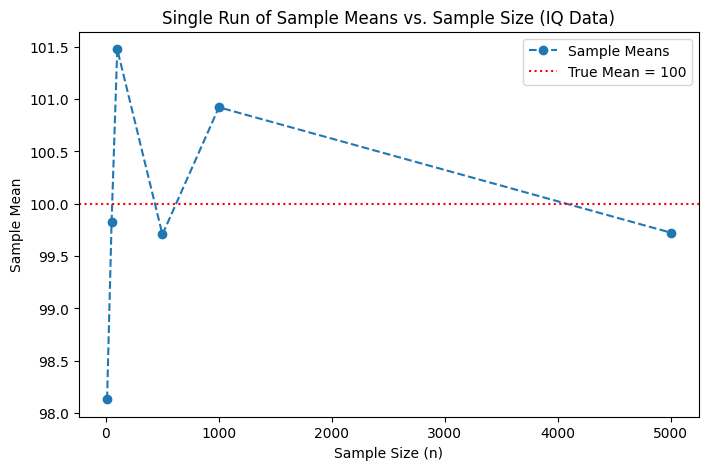

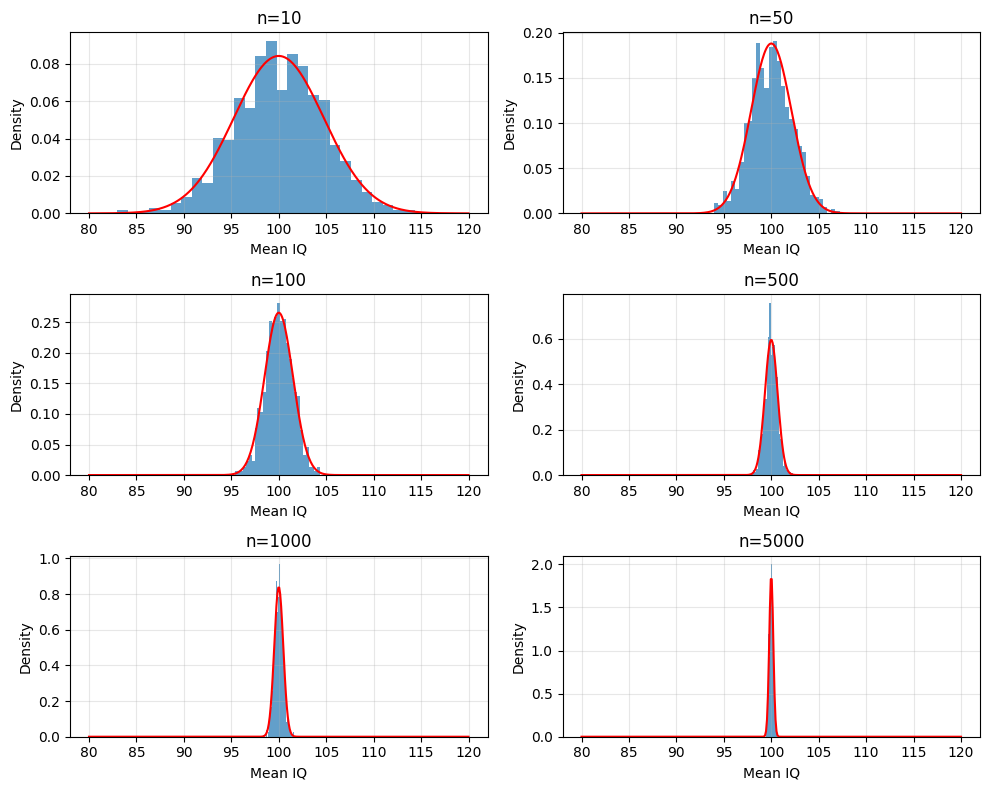

Done! This IQ example demonstrates Z-scores, LLN, and CLT using mean=100, std=15.


In [ ]:
# =========================
# 5. PUTTING IT ALL TOGETHER
# =========================

# (A) SINGLE-RUN DEMONSTRATION OF SAMPLE MEANS
# We'll pick a set of sample sizes, generate a single sample for each,
# compute the mean, and plot how they differ from the true mean.

sample_sizes_final = [10, 50, 100, 500, 1000, 5000]
means_single_run = []

for n in sample_sizes_final:
    # draw n IQ samples
    sample = norm.rvs(loc=true_mean, scale=true_std, size=n)
    # compute the mean
    means_single_run.append(np.mean(sample))

plt.figure(figsize=(8,5))
# We'll plot sample_sizes on the x-axis, sample means on the y-axis
plt.plot(sample_sizes_final, means_single_run, marker='o', linestyle='--', label='Sample Means')

# draw a horizontal line for the true mean of 100
plt.axhline(true_mean, color='red', linestyle=':', label='True Mean = 100')
plt.title("Single Run of Sample Means vs. Sample Size (IQ Data)")
plt.xlabel("Sample Size (n)")
plt.ylabel("Sample Mean")
plt.grid(alpha = 0.3)
plt.legend()
plt.show()

# (B) MULTIPLE-RUN DEMONSTRATION
# For each sample size, do multiple runs, plot histogram of the resulting sample means

num_experiments_final = 1000
plt.figure(figsize=(10, 8))


for i, n in enumerate(sample_sizes_final, start=1):
    all_means = []
    
    # repeat 1000 times
    for _ in range(num_experiments_final):
        # draw n IQ samples
        sample = norm.rvs(loc=true_mean, scale=true_std, size=n)
        # compute mean
        all_means.append(np.mean(sample))
    
    plt.subplot(3, 2, i)
    plt.hist(all_means, bins=30, density=True, alpha=0.7)

    
    # define x-values for the theoretical distribution
    x_vals = np.linspace(80, 120, 400)
    
    # pdf for normal with mean=100, std=15/sqrt(n)
    theo_pdf = norm.pdf(x_vals, loc=true_mean, scale=true_std/np.sqrt(n))
    plt.plot(x_vals, theo_pdf, 'r-')
    plt.title(f"n={n}")
    plt.xlabel("Mean IQ")
    plt.grid(alpha = 0.3)
    plt.ylabel("Density")

plt.tight_layout()
plt.show()

print("Done! This IQ example demonstrates Z-scores, LLN, and CLT using mean=100, std=15.")
